In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [57]:
df=pd.read_csv("House_price_uk.csv")
df

,State,City,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,...,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,ID
0,Uttarakhand,Dehradun,Apartment,3,1454,94.77,0.06518,2015,Furnished,2,...,1,5,Medium,Yes,Yes,Garden,West,Broker,Ready_to_Move,1
1,Uttarakhand,Dehradun,Apartment,2,1374,80.50,0.05859,2019,Unfurnished,3,...,4,3,Medium,Yes,Yes,"Gym, Playground",South,Owner,Under_Construction,2
2,Uttarakhand,Dehradun,Apartment,1,1152,76.63,0.06652,2019,Unfurnished,1,...,5,3,High,No,Yes,"Gym, Playground, Clubhouse",West,Builder,Ready_to_Move,3
3,Uttarakhand,Dehradun,Apartment,4,1038,57.81,0.05569,2022,Semi-furnished,2,...,2,3,High,Yes,Yes,"Garden, Playground, Pool",South,Builder,Ready_to_Move,4
4,Uttarakhand,Dehradun,Apartment,1,1501,82.09,0.05469,2017,Semi-furnished,3,...,5,3,Low,No,No,"Pool, Garden, Playground",West,Owner,Under_Construction,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64995,Uttarakhand,Haldwani,Villa,2,2253,98.66,0.04379,2017,Furnished,2,...,4,1,Low,Yes,Yes,"Clubhouse, Gym",South,Builder,Ready_to_Move,64996
64996,Uttarakhand,Haldwani,Villa,1,2920,138.20,0.04733,2018,Unfurnished,4,...,4,3,Low,Yes,Yes,"Garden, Gym, Playground",South,Builder,Under_Construction,64997
64997,Uttarakhand,Haldwani,Villa,4,2067,91.59,0.04431,2019,Furnished,6,...,3,5,High,Yes,Yes,Clubhouse,West,Broker,Under_Construction,64998
64998,Uttarakhand,Haldwani,Villa,3,2931,119.29,0.04070,2016,Semi-furnished,5,...,2,2,Medium,Yes,Yes,Clubhouse,South,Builder,Ready_to_Move,64999


In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           65000 non-null  object 
 1   City                            65000 non-null  object 
 2   Property_Type                   65000 non-null  object 
 3   BHK                             65000 non-null  int64  
 4   Size_in_SqFt                    65000 non-null  int64  
 5   Price_in_Lakhs                  65000 non-null  float64
 6   Price_per_SqFt                  65000 non-null  float64
 7   Year_Built                      65000 non-null  int64  
 8   Furnished_Status                65000 non-null  object 
 9   Floor_No                        65000 non-null  int64  
 10  Total_Floors                    65000 non-null  int64  
 11  Age_of_Property                 65000 non-null  int64  
 12  Nearby_Schools                  

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

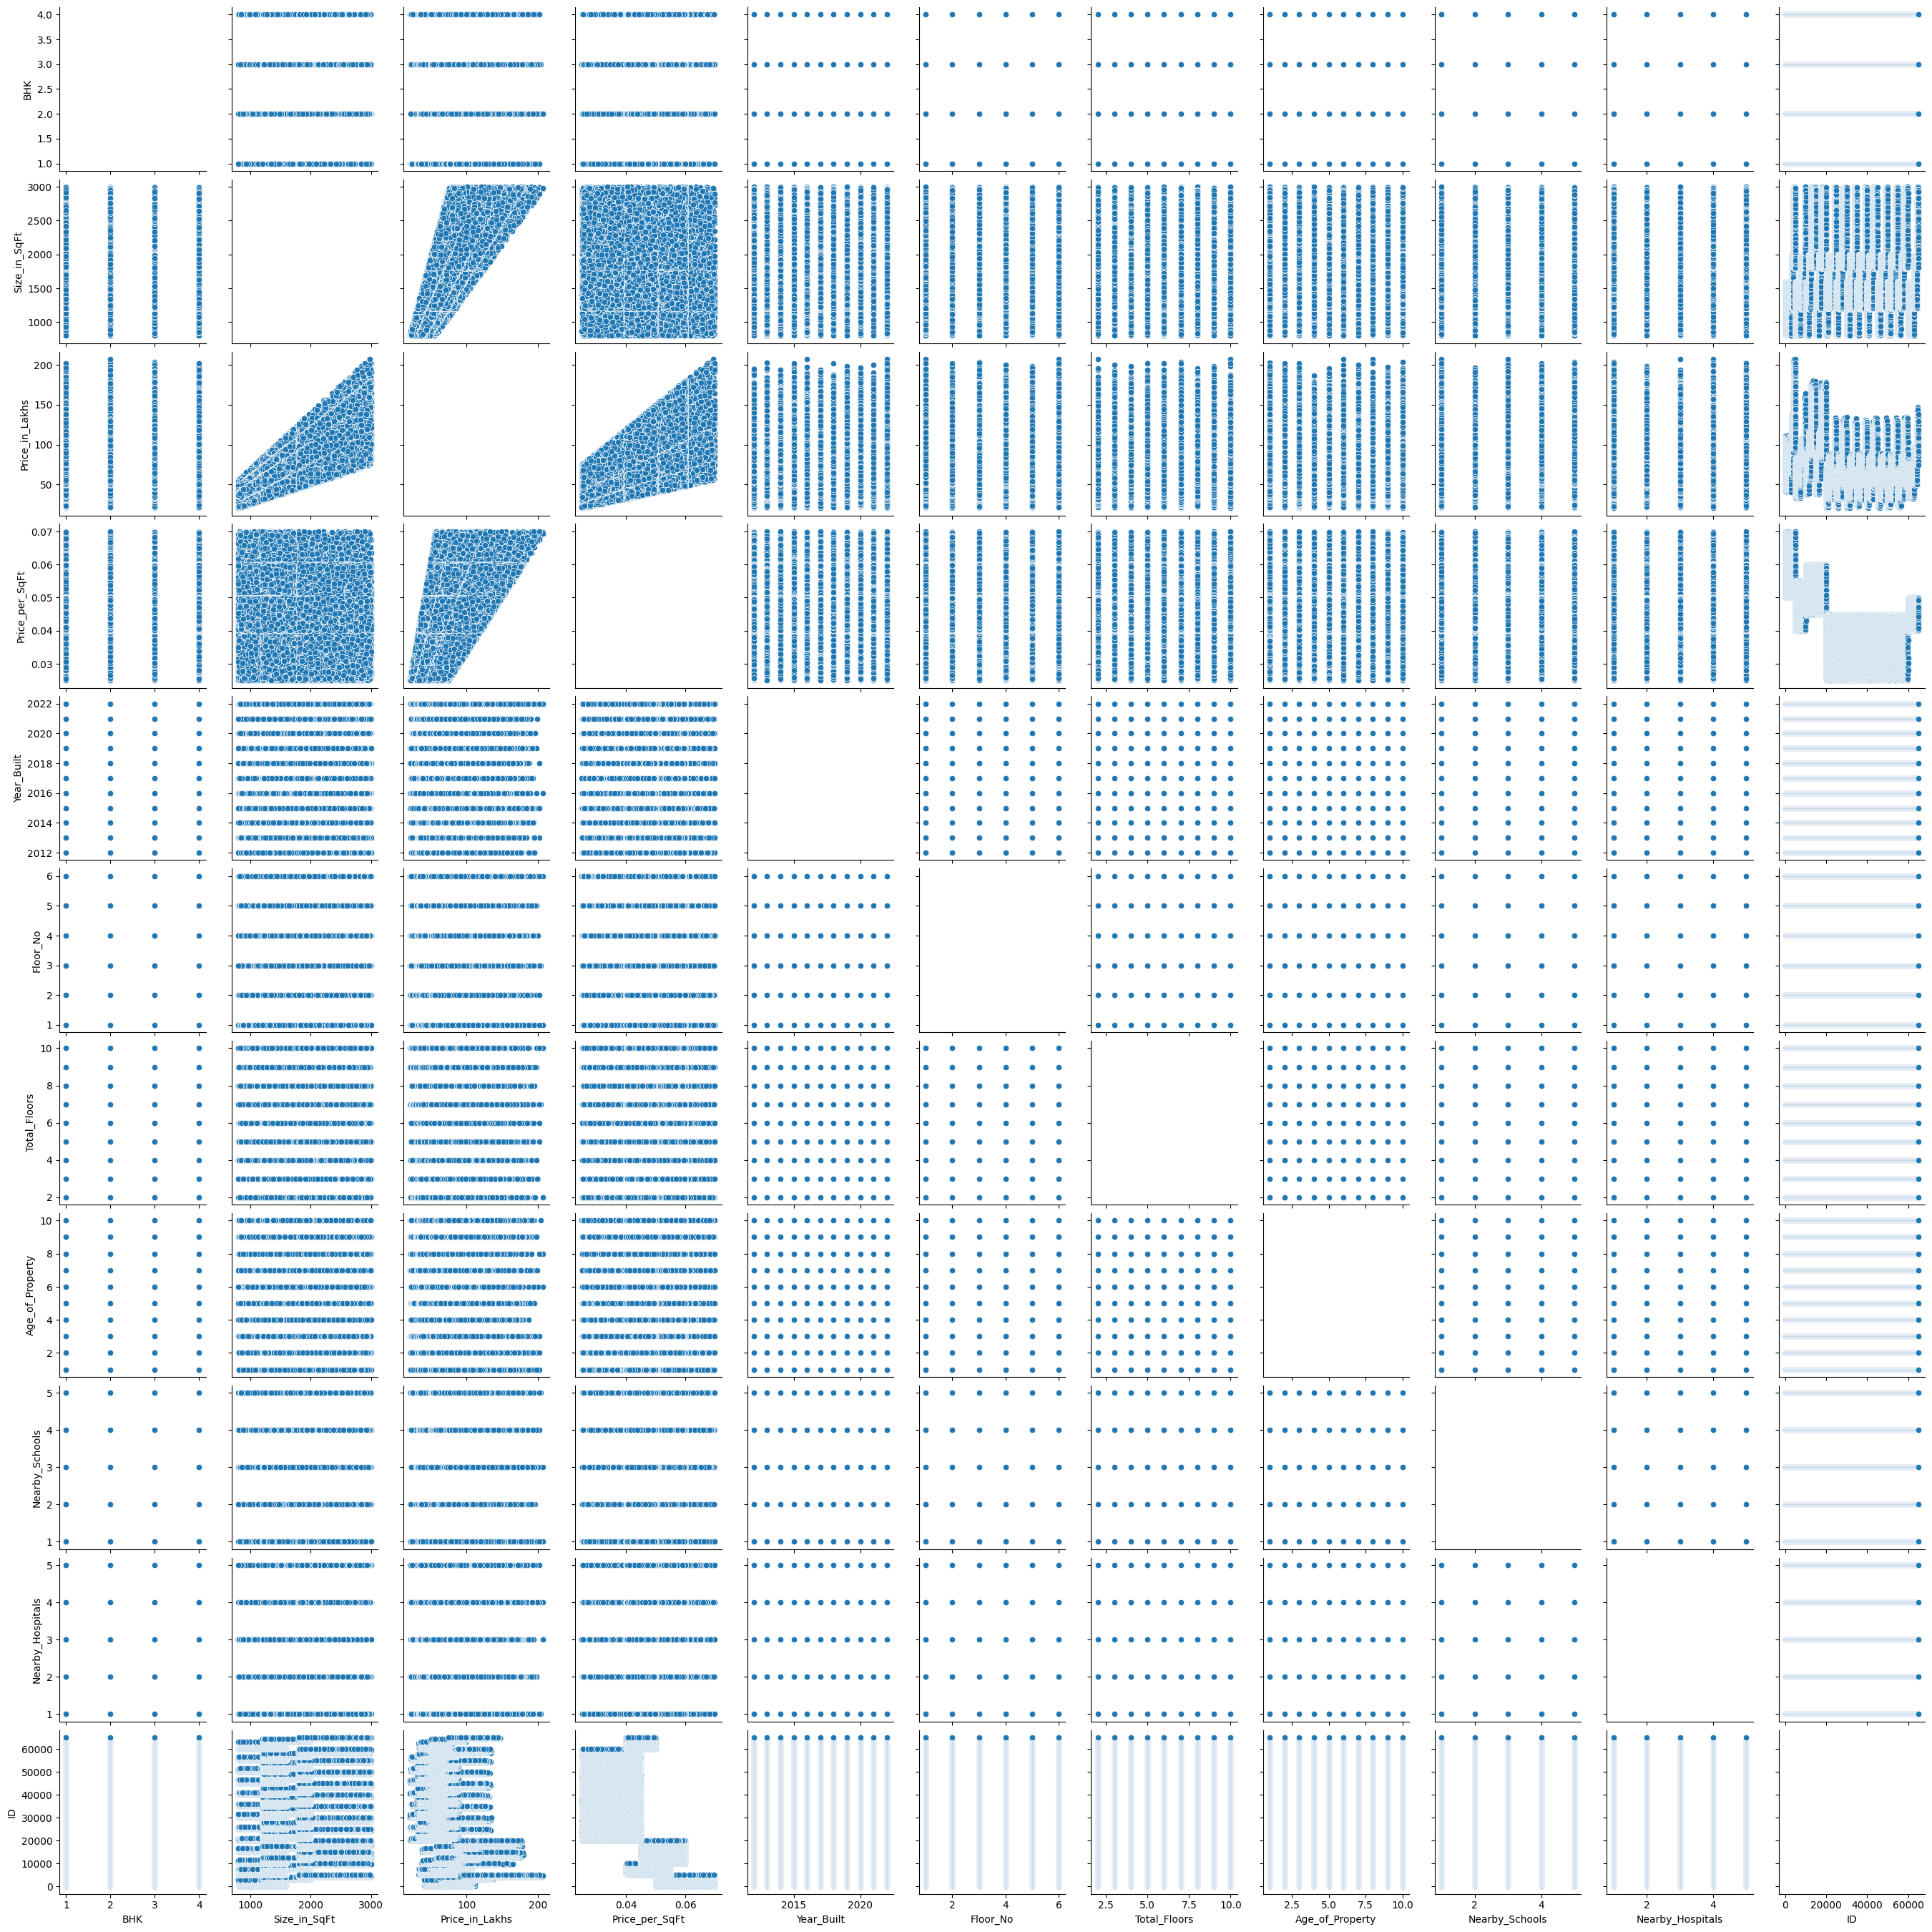

In [ ]:
sns.pairplot(df, diag_kind='scatterplot', markers='o', palette='husl')
plt.show()

In [5]:
df.isnull().sum()

State                             0
City                              0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
ID                                0
dtype: int64

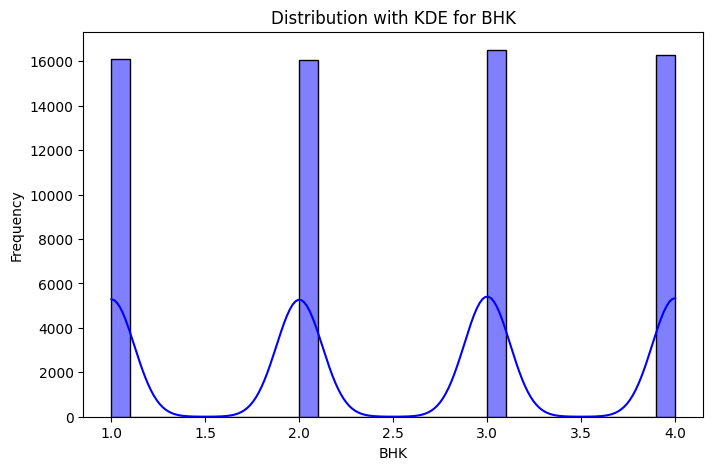

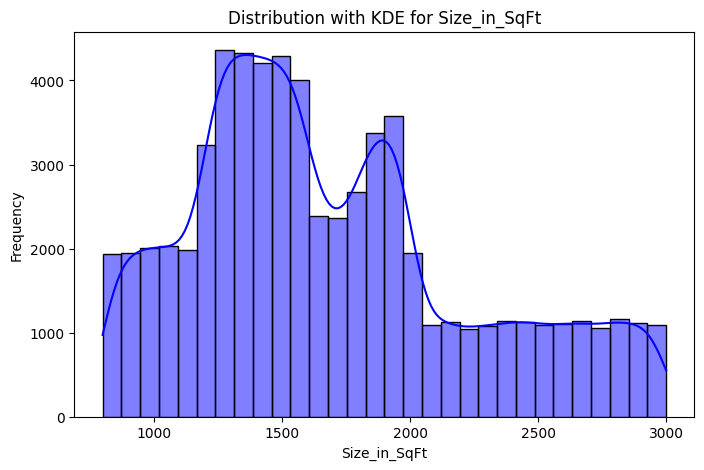

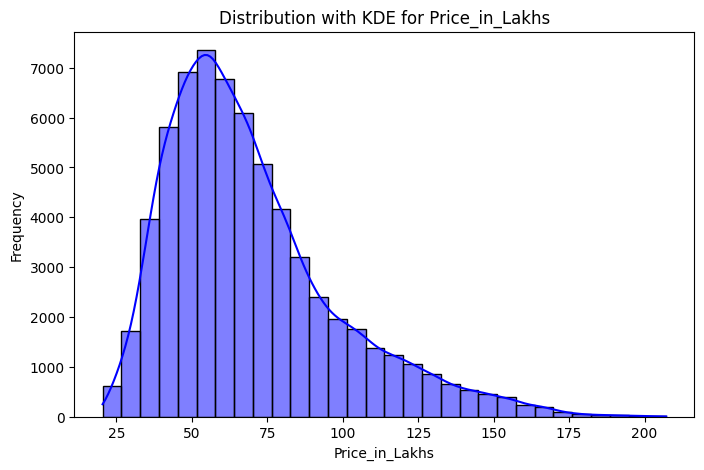

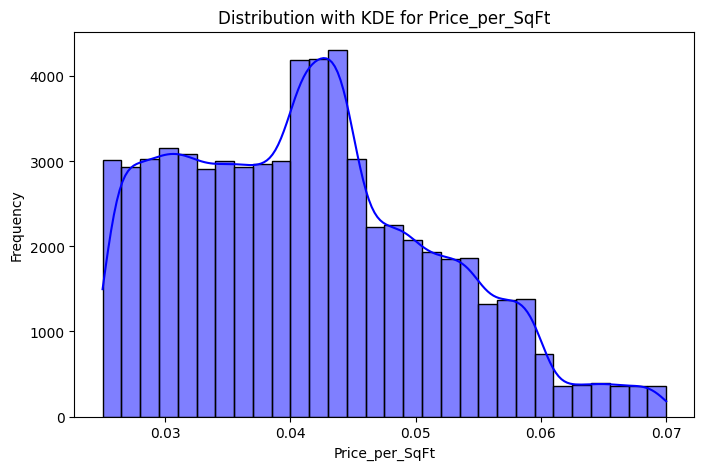

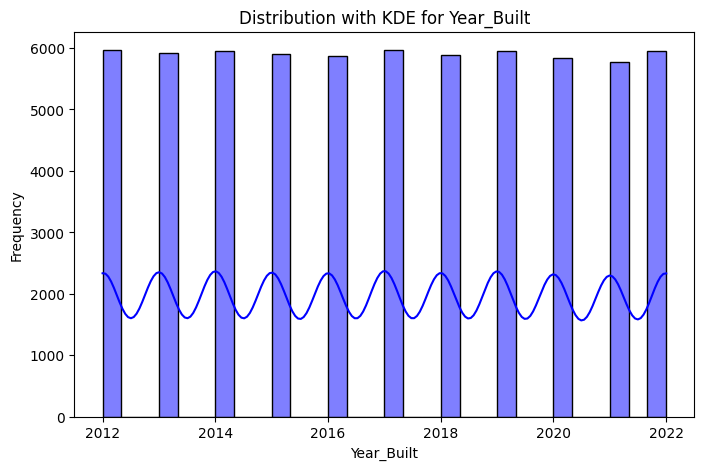

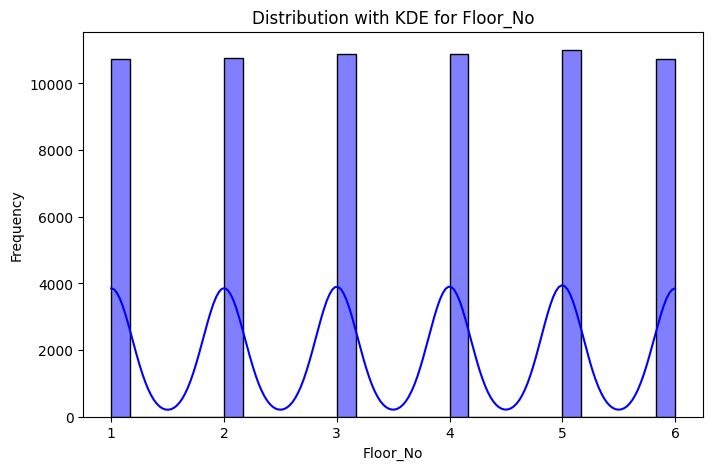

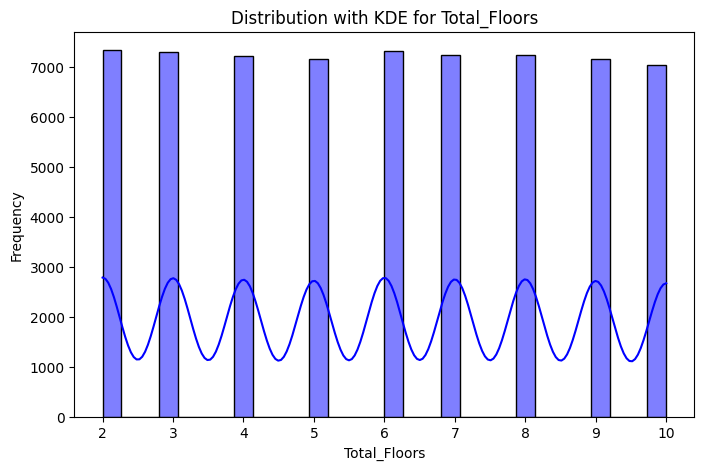

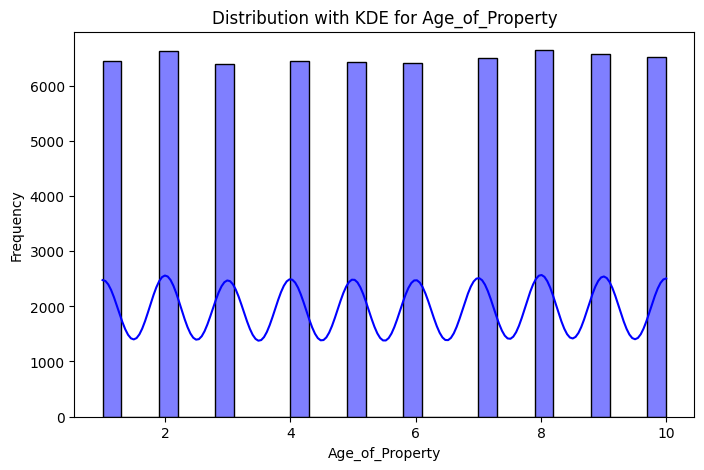

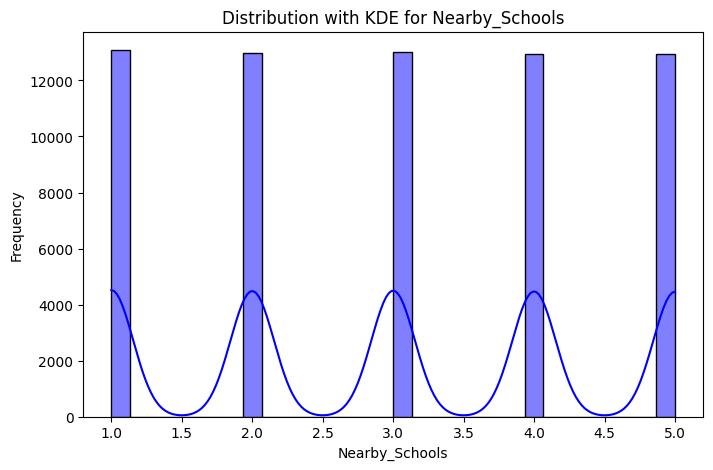

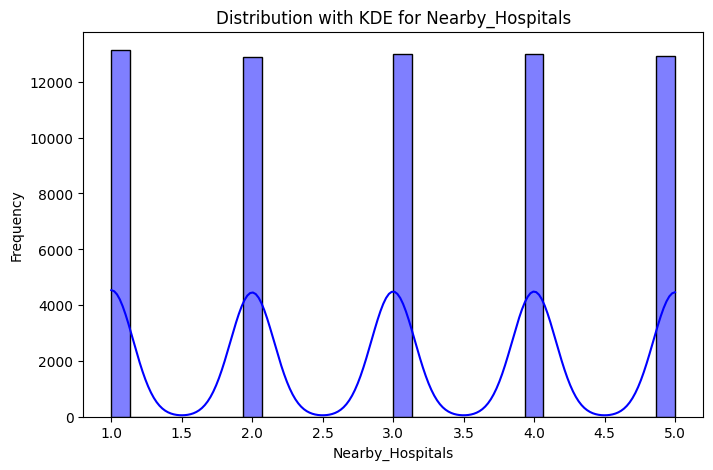

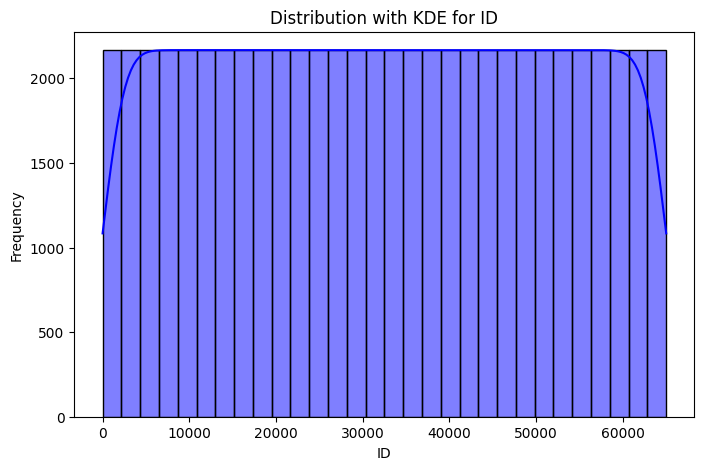

In [6]:
numerical_col = [column for column in df.columns if df[column].dtype != 'object'] # seperated numerical columns

for col in numerical_col:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [7]:
ordinal_columns = ['Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Facing', 'Security']

categories = [['Apartment', 'Independent House', 'Villa'],
              ['Unfurnished', 'Semi-furnished', 'Furnished'],
              ['Low', 'Medium', 'High'],
              ['South', 'East', 'West', 'North'],  # In India, west facing and north facing properties are more valuable
              ['No', 'Yes']]

encoder = OrdinalEncoder(categories=categories)

In [8]:
df.head()


,State,City,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,...,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,ID
0,Uttarakhand,Dehradun,Apartment,3,1454,94.77,0.06518,2015,Furnished,2,...,1,5,Medium,Yes,Yes,Garden,West,Broker,Ready_to_Move,1
1,Uttarakhand,Dehradun,Apartment,2,1374,80.50,0.05859,2019,Unfurnished,3,...,4,3,Medium,Yes,Yes,"Gym, Playground",South,Owner,Under_Construction,2
2,Uttarakhand,Dehradun,Apartment,1,1152,76.63,0.06652,2019,Unfurnished,1,...,5,3,High,No,Yes,"Gym, Playground, Clubhouse",West,Builder,Ready_to_Move,3
3,Uttarakhand,Dehradun,Apartment,4,1038,57.81,0.05569,2022,Semi-furnished,2,...,2,3,High,Yes,Yes,"Garden, Playground, Pool",South,Builder,Ready_to_Move,4
4,Uttarakhand,Dehradun,Apartment,1,1501,82.09,0.05469,2017,Semi-furnished,3,...,5,3,Low,No,No,"Pool, Garden, Playground",West,Owner,Under_Construction,5


In [9]:
categorical_col = [column for column in df.columns if df[column].dtype == 'object']
numerical_col = [column for column in df.columns if df[column].dtype != 'object']

In [10]:
len(categorical_col), len(numerical_col)

(11, 11)

In [11]:
for column in categorical_col:
    df[column] = df[column].str.lower()

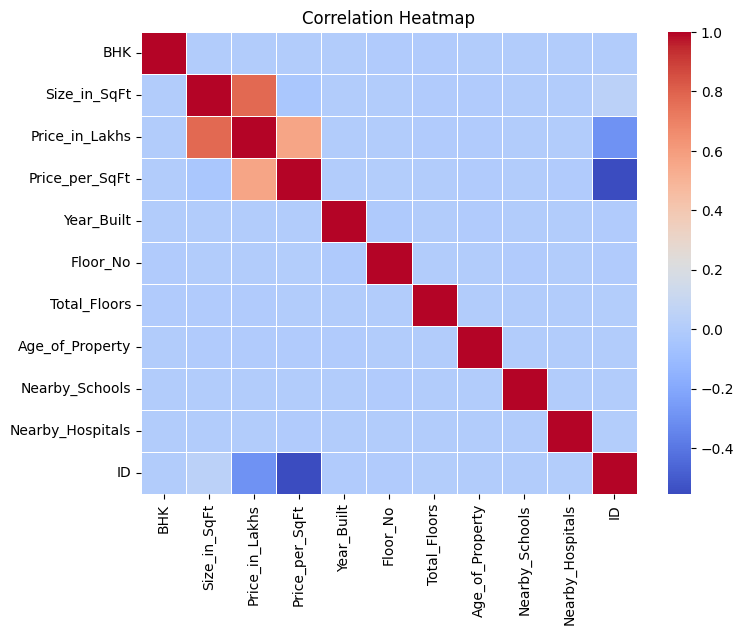

In [12]:
correlation_matrix = df[numerical_col].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Randomly sample 40% of the data
df_sampled = df.sample(frac=0.4, random_state=1)

In [14]:
df_sampled

,State,City,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,...,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,ID
15099,uttarakhand,nainital,apartment,3,1071,62.33,0.05820,2017,furnished,6,...,5,2,medium,no,yes,garden,east,builder,under_construction,15100
51459,uttarakhand,tehri,apartment,4,933,24.27,0.02601,2017,semi-furnished,3,...,2,5,high,no,no,"playground, gym",south,builder,ready_to_move,51460
33751,uttarakhand,pauri,independent house,4,1265,53.84,0.04256,2020,unfurnished,5,...,4,2,low,yes,no,pool,west,owner,under_construction,33752
23098,uttarakhand,almora,independent house,3,1228,54.45,0.04434,2016,semi-furnished,1,...,2,2,low,yes,yes,"playground, garden, gym",south,builder,ready_to_move,23099
37351,uttarakhand,champawat,independent house,4,1286,50.27,0.03909,2013,semi-furnished,6,...,4,5,medium,yes,no,"clubhouse, gym",south,builder,ready_to_move,37352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52424,uttarakhand,tehri,independent house,2,1516,67.36,0.04443,2019,unfurnished,3,...,1,2,high,yes,no,"clubhouse, pool, garden",north,builder,under_construction,52425
34598,uttarakhand,pauri,villa,2,2946,78.54,0.02666,2018,unfurnished,4,...,5,5,low,yes,yes,"playground, pool, garden",west,builder,under_construction,34599
3434,uttarakhand,dehradun,independent house,2,1806,103.61,0.05737,2019,furnished,3,...,3,3,medium,no,yes,"clubhouse, pool, garden",south,builder,under_construction,3435
21144,uttarakhand,almora,independent house,2,1719,62.18,0.03617,2018,furnished,1,...,2,3,high,no,yes,garden,south,builder,under_construction,21145


In [15]:
X = df_sampled.drop('Price_in_Lakhs', axis=1)
y = df_sampled['Price_in_Lakhs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [16]:
len(X_test), len(X_train)

(5200, 20800)

In [17]:
train_dicts = X_train.to_dict(orient='records') # using resampled data as our train feature
test_dicts = X_test.to_dict(orient='records')

In [18]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)

In [19]:
model_results = []

def evaluate_model(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    return mae, mse, rmse, r2

In [20]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [21]:
y_pred = model.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
mae, mse, rmse, r2

(3.7340222786231174,
 30.631779747703582,
 np.float64(5.534598426959591),
 0.9629853583518795)

In [22]:
model_results.append({
    "Model": "Linear Regression",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2
})

In [23]:
scores = []

for i in range(1, 12):
    for min_sample_leaf_values in [1, 3, 4, 5, 6, 8, 10, 15]:
        dt = DecisionTreeRegressor(max_depth=i, min_samples_leaf=min_sample_leaf_values, random_state=1)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)

        scores.append((i, min_sample_leaf_values, mae, mse, rmse, r2))

In [24]:
df_scores = pd.DataFrame(scores, columns=['depth', 'leaf', 'mae', 'mse', 'rmse', 'r2'])

In [25]:
df_scores

,depth,leaf,mae,mse,rmse,r2
0,1,1,16.780007,452.075613,21.262070,0.453724
1,1,3,16.780007,452.075613,21.262070,0.453724
2,1,4,16.780007,452.075613,21.262070,0.453724
3,1,5,16.780007,452.075613,21.262070,0.453724
4,1,6,16.780007,452.075613,21.262070,0.453724
...,...,...,...,...,...,...
83,11,5,0.766195,1.124068,1.060221,0.998642
84,11,6,0.772080,1.127912,1.062032,0.998637
85,11,8,0.805529,1.297689,1.139161,0.998432
86,11,10,0.841425,1.472729,1.213560,0.998220


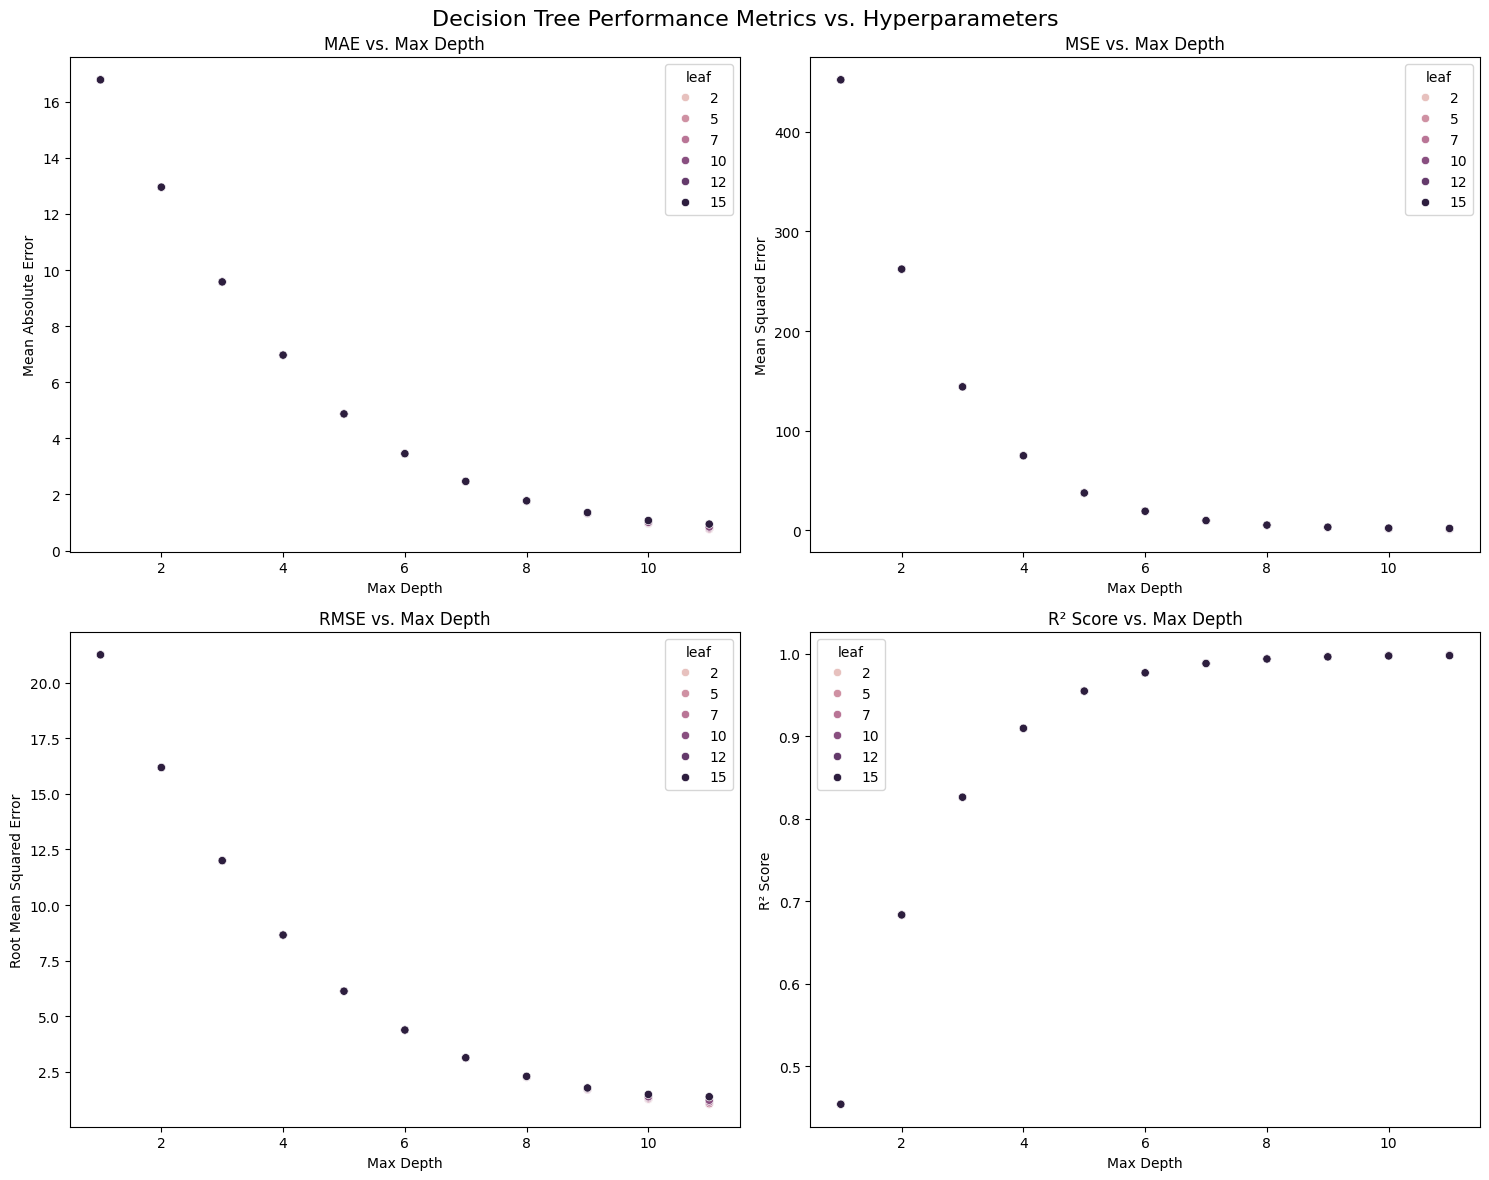


Best Parameters for different metrics:

Best parameters for minimum MAE:
depth    11.000000
leaf      4.000000
mae       0.759640
mse       1.083043
rmse      1.040694
r2        0.998691
Name: 82, dtype: float64

Best parameters for minimum MSE:
depth    11.000000
leaf      3.000000
mae       0.760202
mse       1.069745
rmse      1.034285
r2        0.998707
Name: 81, dtype: float64

Best parameters for minimum RMSE:
depth    11.000000
leaf      3.000000
mae       0.760202
mse       1.069745
rmse      1.034285
r2        0.998707
Name: 81, dtype: float64

Best parameters for maximum R2:
depth    11.000000
leaf      3.000000
mae       0.760202
mse       1.069745
rmse      1.034285
r2        0.998707
Name: 81, dtype: float64


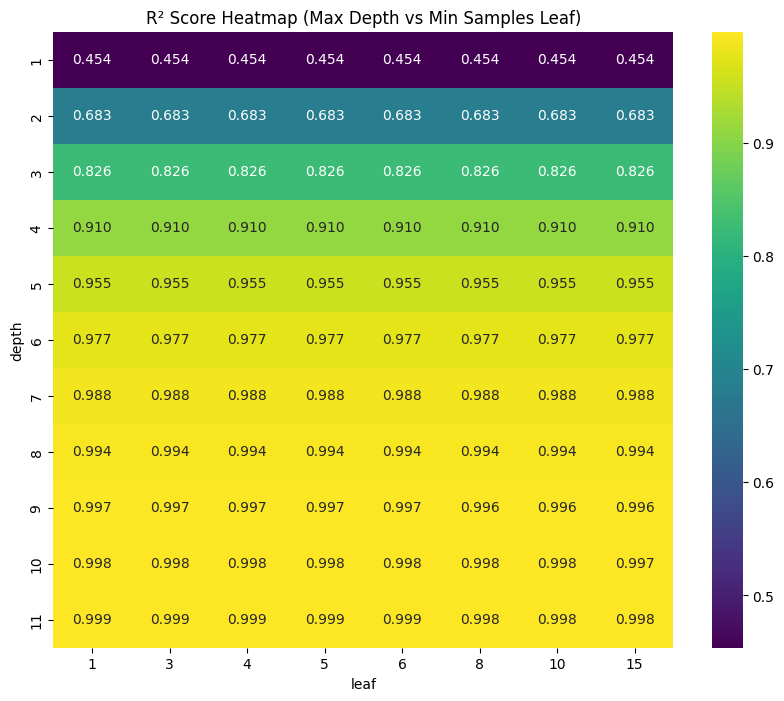

In [26]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Decision Tree Performance Metrics vs. Hyperparameters', fontsize=16)

sns.scatterplot(data=df_scores, x='depth', y='mae', hue='leaf', ax=axes[0,0])
axes[0,0].set_title('MAE vs. Max Depth')
axes[0,0].set_xlabel('Max Depth')
axes[0,0].set_ylabel('Mean Absolute Error')

sns.scatterplot(data=df_scores, x='depth', y='mse', hue='leaf', ax=axes[0,1])
axes[0,1].set_title('MSE vs. Max Depth')
axes[0,1].set_xlabel('Max Depth')
axes[0,1].set_ylabel('Mean Squared Error')

sns.scatterplot(data=df_scores, x='depth', y='rmse', hue='leaf', ax=axes[1,0])
axes[1,0].set_title('RMSE vs. Max Depth')
axes[1,0].set_xlabel('Max Depth')
axes[1,0].set_ylabel('Root Mean Squared Error')

sns.scatterplot(data=df_scores, x='depth', y='r2', hue='leaf', ax=axes[1,1])
axes[1,1].set_title('R² Score vs. Max Depth')
axes[1,1].set_xlabel('Max Depth')
axes[1,1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()

# Find the best parameters based on different metrics
print("\nBest Parameters for different metrics:")
print("\nBest parameters for minimum MAE:")
print(df_scores.loc[df_scores['mae'].idxmin()])

print("\nBest parameters for minimum MSE:")
print(df_scores.loc[df_scores['mse'].idxmin()])

print("\nBest parameters for minimum RMSE:")
print(df_scores.loc[df_scores['rmse'].idxmin()])

print("\nBest parameters for maximum R2:")
print(df_scores.loc[df_scores['r2'].idxmax()])

# Create a heatmap for R2 scores
plt.figure(figsize=(10, 8))
pivot_table = df_scores.pivot(index='depth', columns='leaf', values='r2')
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.3f')
plt.title('R² Score Heatmap (Max Depth vs Min Samples Leaf)')
plt.show()

In [27]:
dt = DecisionTreeRegressor(max_depth=20, min_samples_leaf=15, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
mae, mse, rmse, r2

(0.9221029448314112,
 1.8443212976780132,
 np.float64(1.358057913963176),
 0.997771370371561)

In [28]:
model_results.append({
    "Model": "Decision Tree",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2
})

In [29]:
rf = RandomForestRegressor(random_state=1, n_jobs=-1, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
mae, mse, rmse, r2

(4.655825423076922,
 37.530736320215375,
 np.float64(6.126233452964013),
 0.9546488396324075)

In [30]:
scores = []

for n in range(10, 301, 40): # going to 200 with 40 steps
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_features='sqrt')
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
    mae, mse, rmse, r2
    scores.append((n, mae, mse, rmse, r2))

In [31]:
df_scores = pd.DataFrame(scores, columns=['n_estimator', 'mae', 'mse', 'rmse', 'r2'])

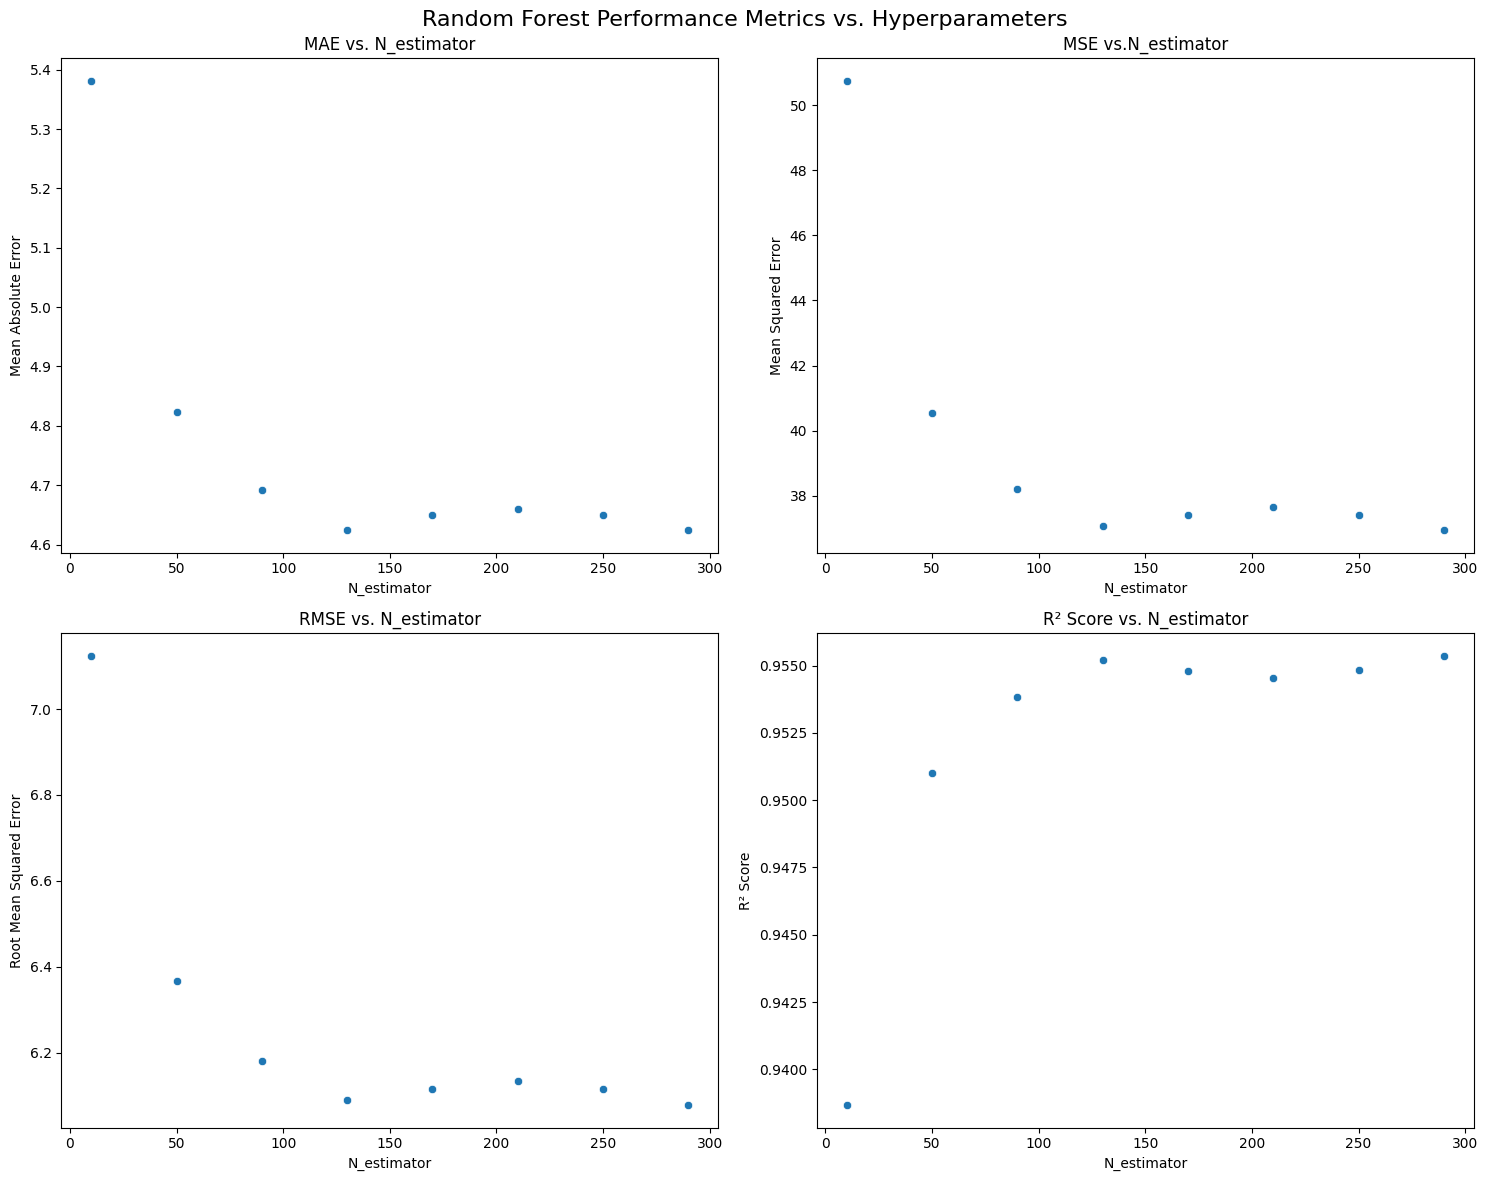

In [32]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Random Forest Performance Metrics vs. Hyperparameters', fontsize=16)

sns.scatterplot(data=df_scores, x='n_estimator', y='mae', ax=axes[0,0], marker='o')
axes[0,0].set_title('MAE vs. N_estimator')
axes[0,0].set_xlabel('N_estimator')
axes[0,0].set_ylabel('Mean Absolute Error')

sns.scatterplot(data=df_scores, x='n_estimator', y='mse', ax=axes[0,1], marker='o')
axes[0,1].set_title('MSE vs.N_estimator')
axes[0,1].set_xlabel('N_estimator')
axes[0,1].set_ylabel('Mean Squared Error')

sns.scatterplot(data=df_scores, x='n_estimator', y='rmse', ax=axes[1,0], marker='o')
axes[1,0].set_title('RMSE vs. N_estimator')
axes[1,0].set_xlabel('N_estimator')
axes[1,0].set_ylabel('Root Mean Squared Error')

sns.scatterplot(data=df_scores, x='n_estimator', y='r2', ax=axes[1,1], marker='o')
axes[1,1].set_title('R² Score vs. N_estimator')
axes[1,1].set_xlabel('N_estimator')
axes[1,1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()


In [33]:
scores = []

for d in [1, 3, 5, 10, 20, 25, 35, 50]: # tuning depths
    rf = RandomForestRegressor(max_depth=d ,n_estimators=100, random_state=1, n_jobs=-1,
                               max_features='sqrt', verbose=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
    mae, mse, rmse, r2
    scores.append((d, mae, mse, rmse, r2))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0

In [34]:
df_scores = pd.DataFrame(scores, columns=['depth', 'mae', 'mse', 'rmse', 'r2'])

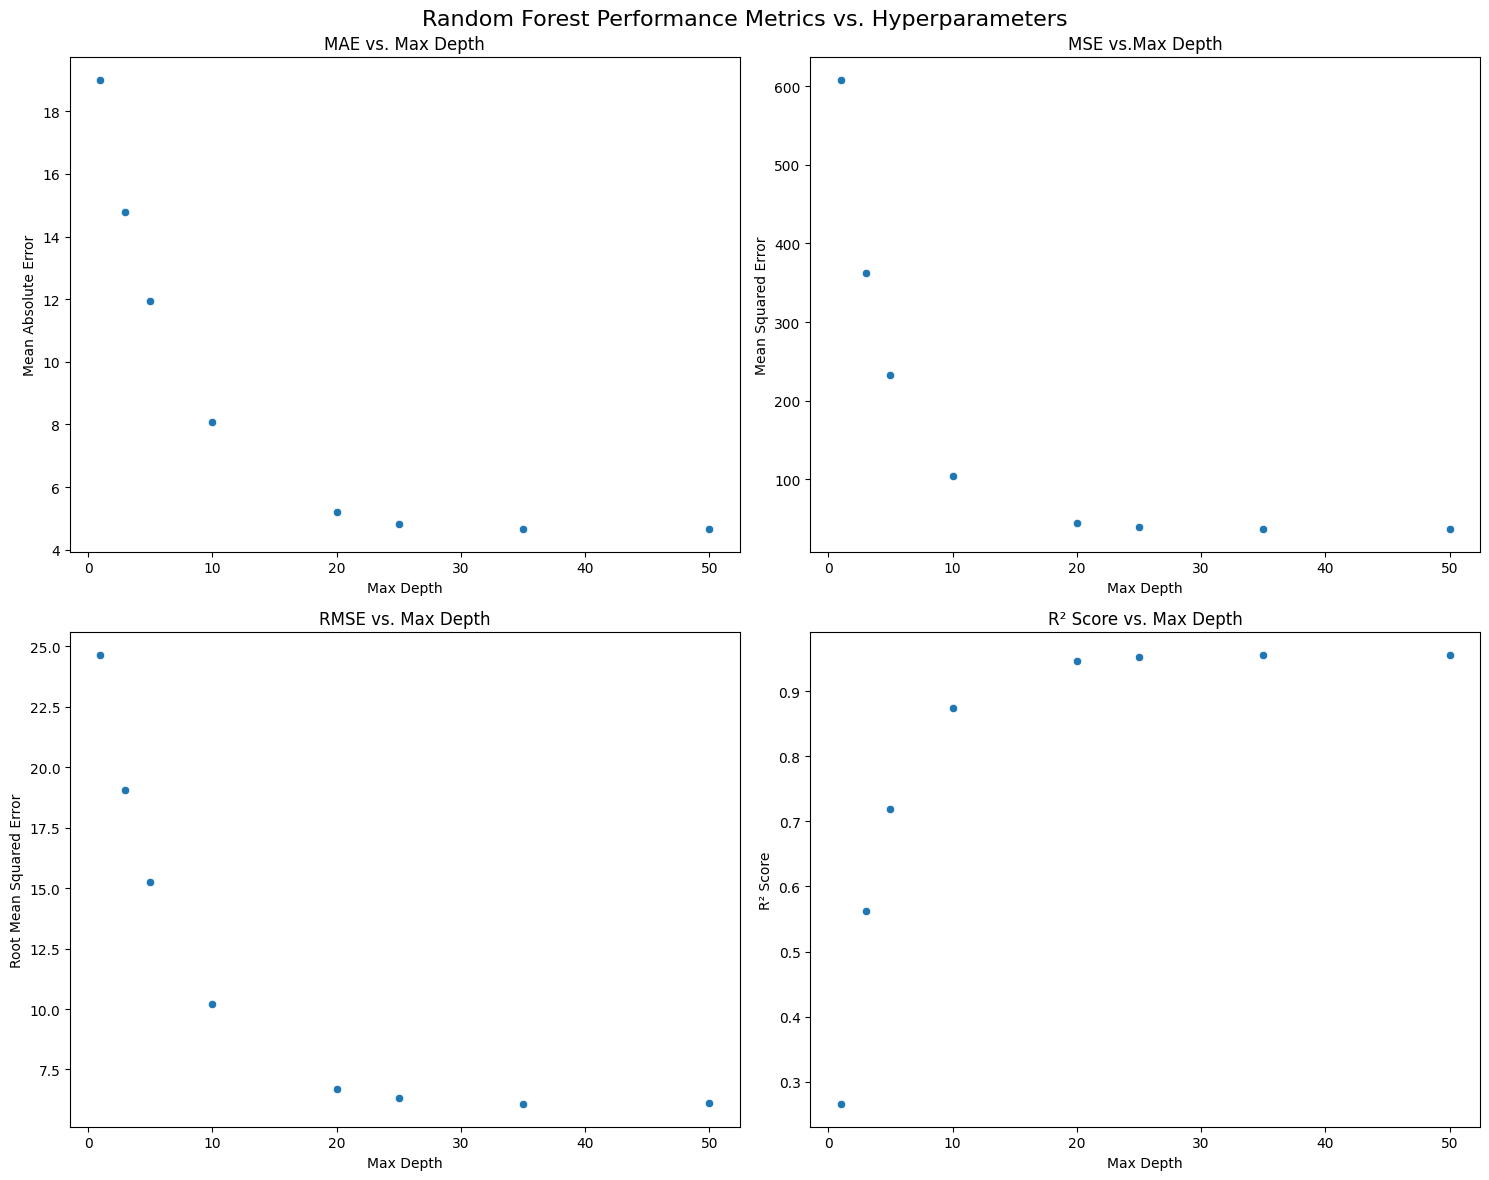

In [35]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Random Forest Performance Metrics vs. Hyperparameters', fontsize=16)

sns.scatterplot(data=df_scores, x='depth', y='mae', ax=axes[0,0], marker='o')
axes[0,0].set_title('MAE vs. Max Depth')
axes[0,0].set_xlabel('Max Depth')
axes[0,0].set_ylabel('Mean Absolute Error')

sns.scatterplot(data=df_scores, x='depth', y='mse', ax=axes[0,1], marker='o')
axes[0,1].set_title('MSE vs.Max Depth')
axes[0,1].set_xlabel('Max Depth')
axes[0,1].set_ylabel('Mean Squared Error')

sns.scatterplot(data=df_scores, x='depth', y='rmse', ax=axes[1,0], marker='o')
axes[1,0].set_title('RMSE vs. Max Depth')
axes[1,0].set_xlabel('Max Depth')
axes[1,0].set_ylabel('Root Mean Squared Error')

sns.scatterplot(data=df_scores, x='depth', y='r2', ax=axes[1,1], marker='o')
axes[1,1].set_title('R² Score vs. Max Depth')
axes[1,1].set_xlabel('Max Depth')
axes[1,1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()


In [36]:
scores = []

for s in [1, 3, 5, 10, 20, 35]: # tuning depths
    rf = RandomForestRegressor(max_depth=50 ,n_estimators=100, min_samples_leaf=s, random_state=1, n_jobs=-1,
                               max_features='sqrt', verbose=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
    mae, mse, rmse, r2
    scores.append((s, mae, mse, rmse, r2))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0

In [37]:
df_scores = pd.DataFrame(scores, columns=['leaf', 'mae', 'mse', 'rmse', 'r2'])

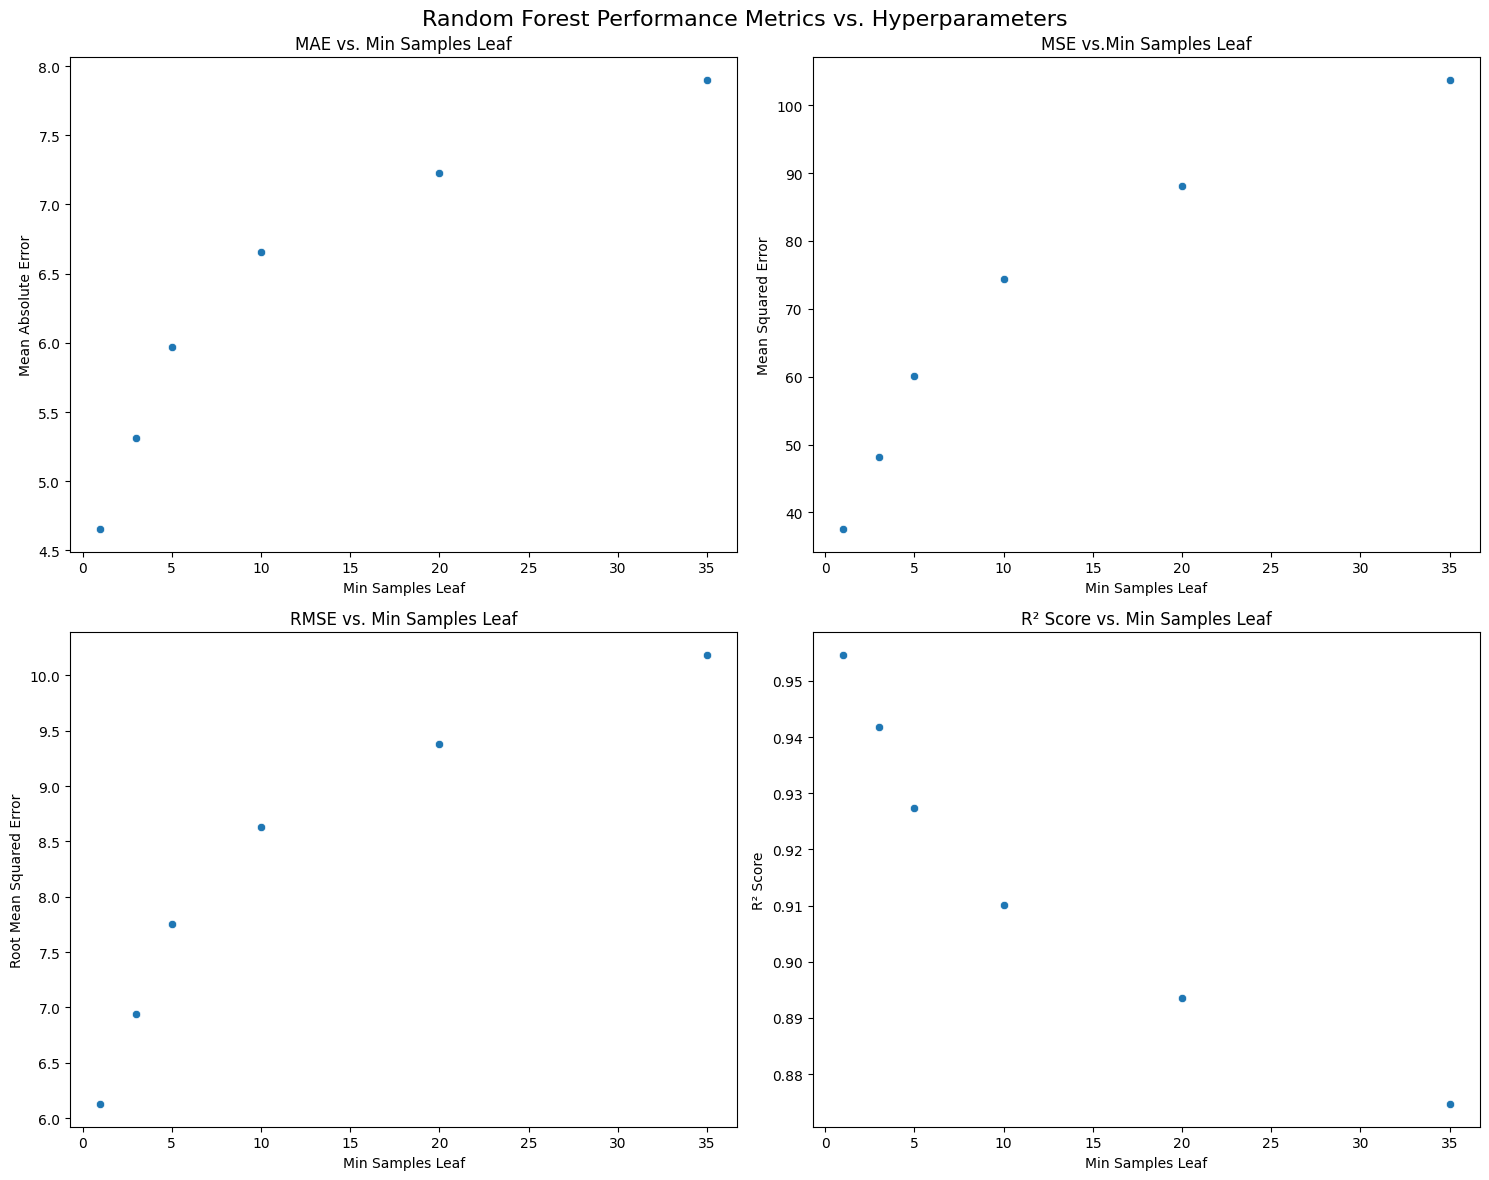

In [38]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Random Forest Performance Metrics vs. Hyperparameters', fontsize=16)

sns.scatterplot(data=df_scores, x='leaf', y='mae', ax=axes[0,0], marker='o')
axes[0,0].set_title('MAE vs. Min Samples Leaf')
axes[0,0].set_xlabel('Min Samples Leaf')
axes[0,0].set_ylabel('Mean Absolute Error')

sns.scatterplot(data=df_scores, x='leaf', y='mse', ax=axes[0,1], marker='o')
axes[0,1].set_title('MSE vs.Min Samples Leaf')
axes[0,1].set_xlabel('Min Samples Leaf')
axes[0,1].set_ylabel('Mean Squared Error')

sns.scatterplot(data=df_scores, x='leaf', y='rmse', ax=axes[1,0], marker='o')
axes[1,0].set_title('RMSE vs. Min Samples Leaf')
axes[1,0].set_xlabel('Min Samples Leaf')
axes[1,0].set_ylabel('Root Mean Squared Error')

sns.scatterplot(data=df_scores, x='leaf', y='r2', ax=axes[1,1], marker='o')
axes[1,1].set_title('R² Score vs. Min Samples Leaf')
axes[1,1].set_xlabel('Min Samples Leaf')
axes[1,1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()


In [39]:
rf = RandomForestRegressor(max_depth=50 ,n_estimators=100, min_samples_leaf=1, random_state=1, n_jobs=-1, max_features='sqrt', verbose=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
mae, mse, rmse, r2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


(4.653237398717948,
 37.528066119029745,
 np.float64(6.126015517367692),
 0.9546520662336965)

In [40]:
model_results.append({
    "Model": "Random Forest",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2
})

In [41]:
features_name = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features_name)
dtest = xgb.DMatrix(X_test, feature_names=features_name)

In [42]:
xgb = XGBRegressor(random_state=1, objective='reg:squarederror')

In [43]:
param_grid = {
    'tree_method': ['hist'],  # Use 'hist' tree_method
    'device': ['cuda'],  # Use GPU via CUDA
    'n_estimators': [100],  # Number of boosting rounds
    'max_depth': [3, 10, 20],         # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
}

In [44]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Negative MSE (higher is better)
    cv=3,                             # 3-fold cross-validation
    verbose=1,                        # Show progress
    n_jobs=-1                         # Use all CPUs
)

In [45]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'device': ['cuda'], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 10, 20], 'n_estimators': [100],
                         'tree_method': ['hist']},
             scoring='neg_mean_squared_error', verbose=1)

In [46]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Convert back from negative MSEP

Best Parameters: {'device': 'cuda', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'tree_method': 'hist'}
Best Score: 0.23833948107960454


In [47]:
xgb = XGBRegressor(tree_method='hist',
                   device='cuda',
                   n_estimators=100,
                   max_depth=10,
                   learning_rate=0.1,
                   random_state=1, objective='reg:squarederror')

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
y_pred = xgb.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
mae, mse, rmse, r2

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:729: UserWarning: [10:27:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


(0.27570635393582854,
 0.19300389980124388,
 np.float64(0.43932209118281756),
 0.9997667791343933)

In [49]:
model_results.append({
    "Model": "XGBoost",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2": r2
})

In [50]:
model_results

[{'Model': 'Linear Regression',
  'MAE': 3.7340222786231174,
  'MSE': 30.631779747703582,
  'RMSE': np.float64(5.534598426959591),
  'R2': 0.9629853583518795},
 {'Model': 'Decision Tree',
  'MAE': 0.9221029448314112,
  'MSE': 1.8443212976780132,
  'RMSE': np.float64(1.358057913963176),
  'R2': 0.997771370371561},
 {'Model': 'Random Forest',
  'MAE': 4.653237398717948,
  'MSE': 37.528066119029745,
  'RMSE': np.float64(6.126015517367692),
  'R2': 0.9546520662336965},
 {'Model': 'XGBoost',
  'MAE': 0.27570635393582854,
  'MSE': 0.19300389980124388,
  'RMSE': np.float64(0.43932209118281756),
  'R2': 0.9997667791343933}]

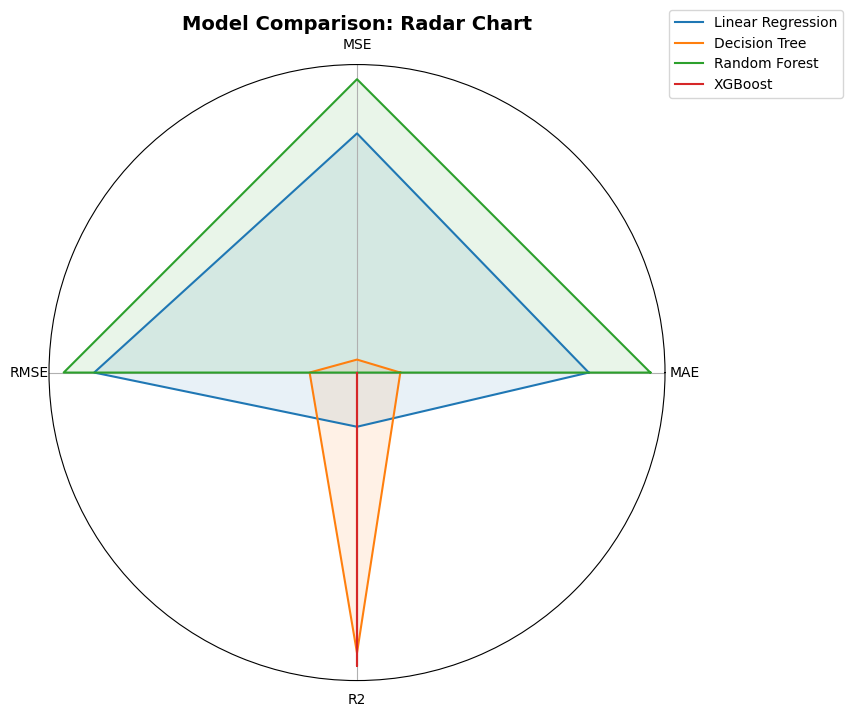

In [51]:
df = pd.DataFrame(model_results)

# Normalize metrics for better visualization (0-1 scale)
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
normalized_df = df.copy()
for metric in metrics:
    normalized_df[metric] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())

# Radar chart setup
labels = metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in normalized_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=row['Model'])
    ax.fill(angles, values, alpha=0.1)

ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Model Comparison: Radar Chart", fontsize=14, weight='bold')

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3952\2881382798.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, ax=ax, palette=colors)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3952\2881382798.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3952\2881382798.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, ax=ax, palette=colors)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3952\2881382798.py:14: UserWarning: set_ticklabels() should only be

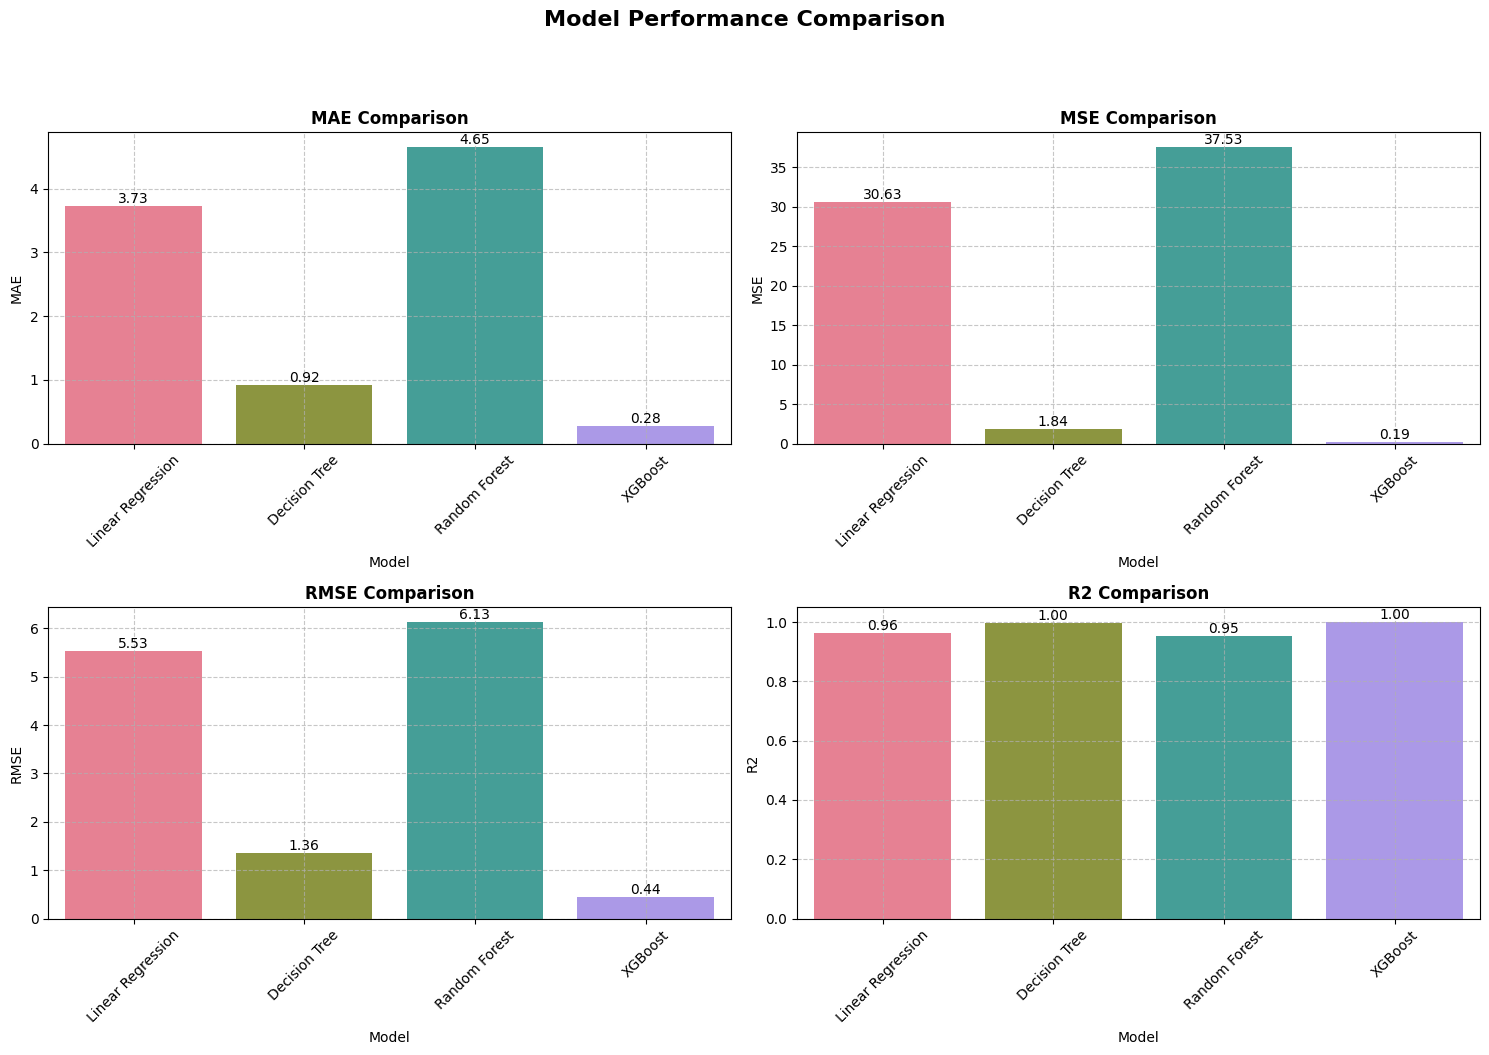

In [52]:
df = pd.DataFrame(model_results)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.05)

axes = axes.flatten()

metrics = ['MAE', 'MSE', 'RMSE', 'R2']
colors = sns.color_palette("husl", 4)

for i, (metric, ax) in enumerate(zip(metrics, axes)):
    sns.barplot(x='Model', y=metric, data=df, ax=ax, palette=colors)
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add value labels on top of each bar
    for j, v in enumerate(df[metric]):
        ax.text(j, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [53]:
import joblib

# Save both models as a dictionary in one file
joblib.dump({'random_forest': rf, 'xgboost': xgb}, 'model.bin')


['model.bin']

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

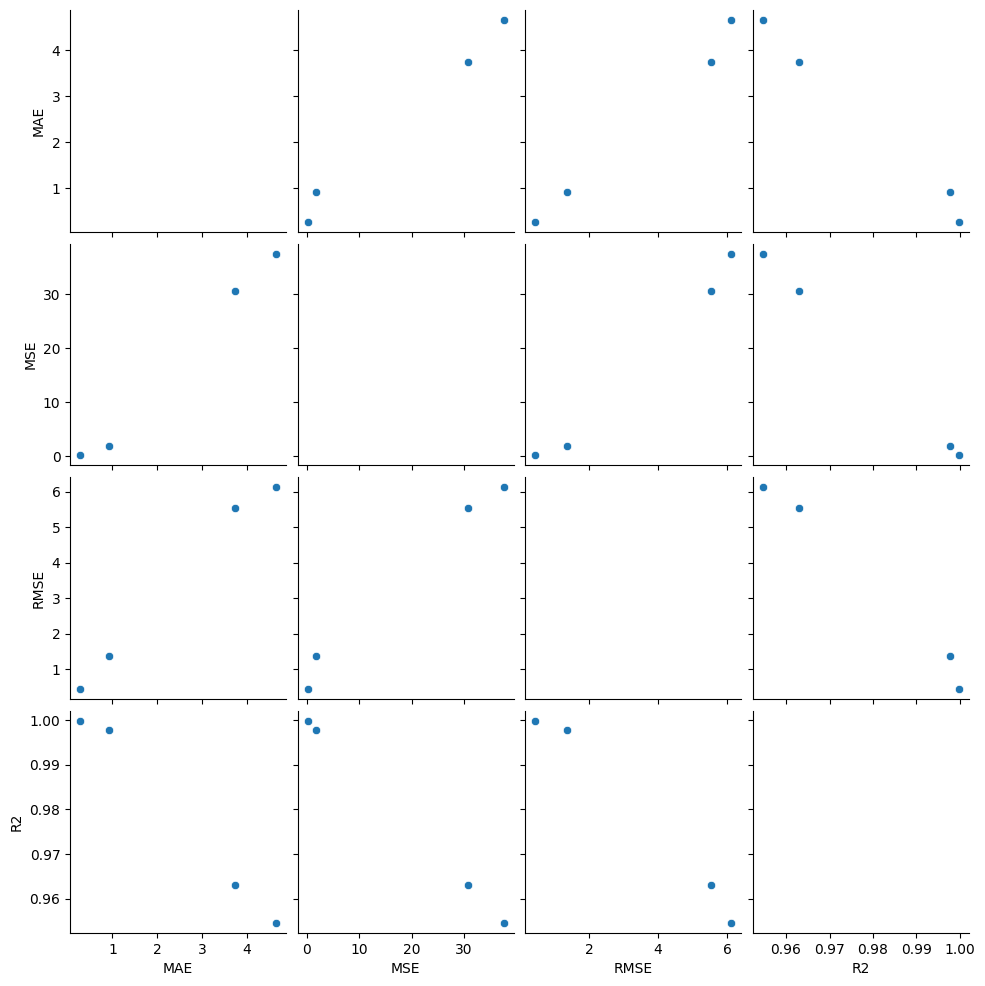